# Regressão Logística

## Modelo

Linear: Calcula $\sum{w_ix_i} = s$ e "faz algo" com o resultado.

No caso do perceptron, esse "algo" se resumiu a olhar o sinal de $s$ e fazer a classificação de acordo. 

No caso da Regressão Logística, utilizaremos a função logística $\theta(s) = \frac{e^{s}}{1+e^{s}}$ para restringir $s$ no intervalo $(0,1)$ e, assim, obter uma interpretação probabilística para a classificação.

Pontos acima da reta $\sum{w_ix_i} = 0$ (ou seja $s>0$), terão $\theta(s)>0.5$. Por outro lado, pontos abaixo da reta ($s<0$), terão $\theta(s)<0.5$. Assim, podemos interpretar $\theta(s)$ como $P(y=+1|x)$

## Erro

A função de perda a ser minimizada para encontrar um vetor de pesos $W$ adequado é a Entropia Cruzada:

$
\begin{align}
E_{in}(W)= \frac{1}{N}\sum_{n=1}^N{ln(1+e^{-y_nW^TX_n})}
\end{align}
$

Resumidamente, essa medida reflete o quão provável é para o nosso modelo gerar as saídas $y$ corretas, se a distribuição alvo $P(y|x)$ foi realmente capturada  pela nossa hipótese. Minimizar a Entropia Cruzada é equivalente a maximizar essa probabilidade.

Observa-se que utilizar essa função de perda faz com que $\theta(s)$ seja tratado como uma probabilidade genuína até mesmo durante o aprendizado, e não apenas uma função qualquer cuja imagem é o intervalo $(0,1)$.

## Algoritmo de Otimização: Gradiente Descendente

O que é o vetor gradiente?

Seja $f$ um campo escalar, ou seja, uma função $\R^n \to \R$. O vetor gradiente de $f$ no ponto $x$ ($\nabla f(x)$) é o vetor de dimensão $n$ que aponta para a direção e sentido de maior crescimento da função em $x$. Intuitivamente, o oposto do vetor gradiente dará o sentido de maior decrescimento da função.

Logo, o Gradiente Descendente consiste em buscar um ponto mínimo de $f$ dando "passos" na direção oposta do gradiente.

Para encontrar o mínimo de $E_{in}$, em cada iteração calcula-se $\nabla E_{in}(W_t)$ e atualiza-se $W$ com a regra 

$
\begin{align}
W_{t+1} = W_t - \eta \nabla E_{in}(W_t)
\end{align}
$

Onde $\eta$ representa a taxa de aprendizado.

Para calcular $\nabla E_{in}(W)$, utiliza-se a seguinte expressão:

$
\begin{align}
\nabla E_{in}(W)= -\frac{1}{N} \sum_{n=1}^N \frac{y_nX_n}{1+e^{y_nW^TX_n}}
\end{align}
$

## Algoritmo de Regressão Logística


<center><img src="a.png"/></center>


In [36]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator,ClassifierMixin
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

## Implementação:

In [295]:
class MyLR(BaseEstimator,ClassifierMixin):
    def __init__(self, p_threshold=0.5, max_it=1000, step = 0.1, max_err=0.01, seed=None):
        self.max_it = max_it
        self.p_threshold = p_threshold
        self.max_err=max_err
        self.step = step
        self.seed = seed

    def get_err(self,X,y):
        N= len(X)
        err = np.sum(np.log(1+np.exp(np.sum(-y*self.w*X, axis = 1))), axis=0)/N
        return err
        
    
    def fit(self, X, y):
        N= len(X)
        dim = X.shape[1]

        if self.seed != None:
            np.random.seed(self.seed)
        self.w = np.random.rand(1+dim)*10
        
        t=0
        over = False
        ones = np.ones(N)
        Xn = np.insert(X, 0, ones, axis=1)
        yn = np.array([y]).T

        with tqdm(total=self.max_it)as pb:
            while(not over):

                gradient = np.sum(((yn*Xn)/np.array([(1+np.exp(np.sum(yn*self.w*Xn, axis=1)))]).T), axis=0)/N

                v = self.step*gradient
                self.w += v
                t+=1
                
                over = (t>=self.max_it) or  self.get_err(Xn,yn) <= self.max_err
                pb.update(1)
        
        print(f"O erro final é { self.get_err(Xn,yn)}")
                
        

    def predict(self,X):
        y = np.zeros(len(X))
        N= len(X)
        ones = np.ones(N)
        Xn = np.insert(X, 0, ones, axis=1)

        for i in range(len(X)):
            y[i] = 1 if 1/(1+np.exp(-np.sum(self.w*Xn[i])))>=self.p_threshold else -1

        return y
    
    def predict_proba(self,X):
        y = np.zeros((len(X),2))
        N= len(X)
        ones = np.ones(N)
        Xn = np.insert(X, 0, ones, axis=1)

        for i in range(len(X)):
            y[i,0] = 1/(1+np.exp(-np.sum(self.w*Xn[i])))
            y[i,1] = 1- y[i,0]

        return y

        

## Primeiro Teste:

$x[0]=x[1]+noise$\
$y = +1$ se $x[0]>x[1]$ \
$y = -1$ cc.

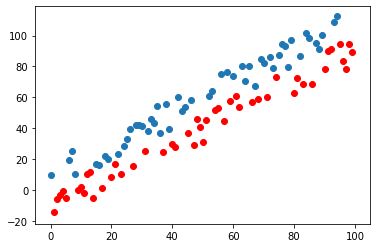

In [296]:
X_train = np.array([[i+(random.random()-0.5)*40,i] for i in range(100)])
y_train = np.array([1 if X_train[i,0]>i else -1 for i in range(100)])

blue = np.array([X_train[i,:] for i in range(100) if y_train[i]==1 ])
red = np.array([X_train[i,:] for i in range(100) if y_train[i]==-1 ])

fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")

### Treinando o modelo

In [297]:
clf = MyLR()
clf.fit(X_train,y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_10401/1477593649.py:32: RuntimeWarning: overflow encountered in exp
  gradient = np.sum(((yn*Xn)/np.array([(1+np.exp(np.sum(yn*self.w*Xn, axis=1)))]).T), axis=0)/N
/tmp/ipykernel_10401/1477593649.py:11: RuntimeWarning: overflow encountered in exp
  err = np.sum(np.log(1+np.exp(np.sum(-y*self.w*X, axis = 1))), axis=0)/N
 68%|██████▊   | 683/1000 [00:00<00:00, 18655.19it/s]

O erro final é 0.006947117970525949


### Teste

Acurácia em conjunto de teste: 0.99
[array([[2.28083395e-05, 9.99977192e-01],
       [5.55465753e-04, 9.99444534e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.98037223e-78, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [7.62408018e-84, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.85080040e-77, 1.00000000e+00]])]


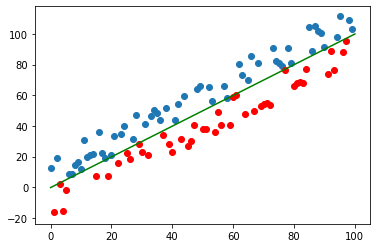

In [298]:
X_test = np.array([[i+(random.random()-0.5)*40,i] for i in range(100)])
y_test = np.array([1 if X_test[i,0]>i else -1 for i in range(100)])

print(f"Acurácia em conjunto de teste: {clf.score(X_test,y_test)}")

y_pred = clf.predict(X_test)
t = clf.predict_proba(X_test)


blue = np.array([X_test[i,:] for i in range(100) if y_pred[i]==1 ])
red = np.array([X_test[i,:] for i in range(100) if y_pred[i]==-1 ])

x= np.linspace(0,100,500)
fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")
ax.plot(x, -(clf.w[0]+x*clf.w[2])/clf.w[1], color="g")
print([t[60:70]])



## Segundo Teste:
$x[0]=-x[1]+noise$\
$y = +1$ se $x[0]>x[1]$ \
$y = -1$ cc.

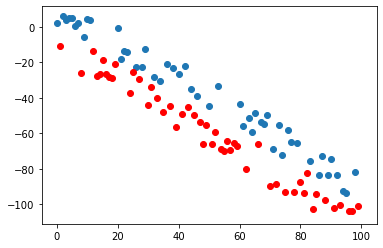

In [306]:
X_train = np.array([[-i+(random.random()-0.5)*40,i] for i in range(100)])
y_train = np.array([1 if X_train[i,0]>-i else -1 for i in range(100)])

blue = np.array([X_train[i,:] for i in range(100) if y_train[i]==1 ])
red = np.array([X_train[i,:] for i in range(100) if y_train[i]==-1 ])

fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")

### Treinando o Modelo

In [307]:
clf = MyLR()
clf.fit(X_train,y_train)


 60%|█████▉    | 599/1000 [00:00<00:00, 17323.71it/s]

O erro final é 0.0069855685611788995


### Teste

Acurácia em conjunto de teste: 0.99
[array([[1.13769863e-75, 1.00000000e+00],
       [1.24462233e-39, 1.00000000e+00],
       [4.52966253e-68, 1.00000000e+00],
       [2.45974405e-69, 1.00000000e+00],
       [9.84588286e-58, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [3.73277626e-01, 6.26722374e-01],
       [3.10023170e-40, 1.00000000e+00],
       [2.00635803e-16, 1.00000000e+00],
       [1.00000000e+00, 3.54896112e-11]])]


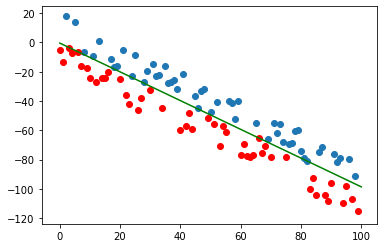

In [308]:
X_test = np.array([[-i+(random.random()-0.5)*40,i] for i in range(100)])
y_test = np.array([1 if X_test[i,0]>-i else -1 for i in range(100)])

print(f"Acurácia em conjunto de teste: {clf.score(X_test,y_test)}")

y_pred = clf.predict(X_test)
t = clf.predict_proba(X_test)


blue = np.array([X_test[i,:] for i in range(100) if y_pred[i]==1 ])
red = np.array([X_test[i,:] for i in range(100) if y_pred[i]==-1 ])

x= np.linspace(0,100,500)
fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")
ax.plot(x, -(clf.w[0]+x*clf.w[2])/clf.w[1], color="g")
print([t[60:70]])

### Terceiro teste: 
Não separável linearmente

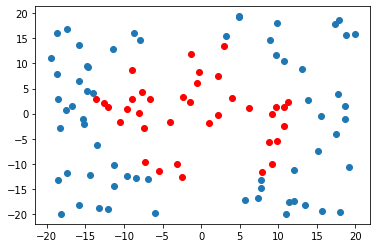

In [309]:
X_train = np.array([[(random.random()-0.5)*40,(random.random()-0.5)*40] for i in range(100)])
y_train = np.array([1 if X_train[i,0]**2 + X_train[i,1]**2>200  else -1 for i in range(100)])

blue = np.array([X_train[i,:] for i in range(100) if y_train[i]==1 ])
red = np.array([X_train[i,:] for i in range(100) if y_train[i]==-1 ])

fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")

### Treino

In [310]:
clf = MyLR()
clf.fit(X_train,y_train)

100%|██████████| 1000/1000 [00:00<00:00, 16915.38it/s]

O erro final é 1.1478053606259613


### Teste

Acurácia em conjunto de teste: 0.34
[array([[0.99020077, 0.00979923],
       [0.11585194, 0.88414806],
       [0.69841704, 0.30158296],
       [0.79665988, 0.20334012],
       [0.93682601, 0.06317399],
       [0.95519382, 0.04480618],
       [0.83391086, 0.16608914],
       [0.32153577, 0.67846423],
       [0.19835584, 0.80164416],
       [0.83272157, 0.16727843]])]


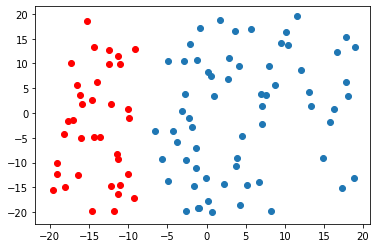

In [311]:
X_test = np.array([[(random.random()-0.5)*40,(random.random()-0.5)*40] for i in range(100)])
y_test = np.array([1 if X_test[i,0]**2 + X_test[i,1]**2>200  else -1 for i in range(100)])

print(f"Acurácia em conjunto de teste: {clf.score(X_test,y_test)}")

y_pred = clf.predict(X_test)
t = clf.predict_proba(X_test)


blue = np.array([X_test[i,:] for i in range(100) if y_pred[i]==1 ])
red = np.array([X_test[i,:] for i in range(100) if y_pred[i]==-1 ])

fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")
print([t[60:70]])

## Quarto Teste:

Divisão em $x$ = 0

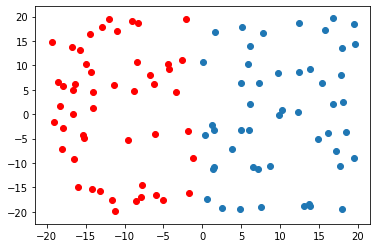

In [312]:
X_train = np.array([[(random.random()-0.5)*40,(random.random()-0.5)*40] for i in range(100)])
y_train = np.array([1 if X_train[i,1]>0  else -1 for i in range(100)])

blue = np.array([X_train[i,:] for i in range(100) if y_train[i]==1 ])
red = np.array([X_train[i,:] for i in range(100) if y_train[i]==-1 ])

fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")

### Treino

In [313]:
clf = MyLR()
clf.fit(X_train,y_train)

  5%|▌         | 52/1000 [00:00<00:00, 19478.77it/s]

O erro final é 0.00980344405040676


### Teste

Acurácia em conjunto de teste: 0.97
[array([[2.41217902e-11, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.58579540e-08, 9.99999984e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.99999993e-01, 6.79357393e-09],
       [9.99931728e-01, 6.82716806e-05]])]


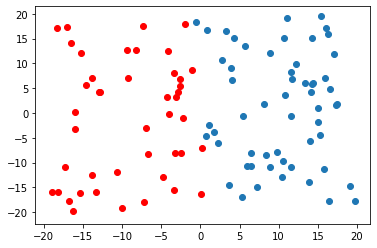

In [314]:
X_test = np.array([[(random.random()-0.5)*40,(random.random()-0.5)*40] for i in range(100)])
y_test = np.array([1 if X_test[i,1]>0  else -1 for i in range(100)])

print(f"Acurácia em conjunto de teste: {clf.score(X_test,y_test)}")

y_pred = clf.predict(X_test)
t = clf.predict_proba(X_test)


blue = np.array([X_test[i,:] for i in range(100) if y_pred[i]==1 ])
red = np.array([X_test[i,:] for i in range(100) if y_pred[i]==-1 ])

x = np.linspace(-1,1,10)
fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")
#ax.plot(x, -(clf.w[0]+x*clf.w[2])/clf.w[1], color="g")
print([t[60:70]])

## Quinto Teste:

"Mais ou menos" linearmente separável.

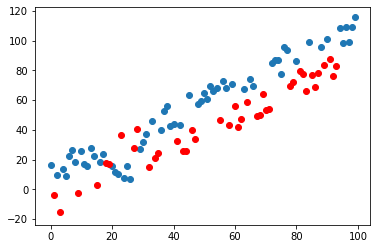

In [325]:
X_train = np.array([[i+(random.random()-0.5)*40,i] for i in range(100)])
y_train = np.array([1 if X_train[i,0]>i else -1 for i in range(100)])
y_train[20:30] *= -1

blue = np.array([X_train[i,:] for i in range(100) if y_train[i]==1 ])
red = np.array([X_train[i,:] for i in range(100) if y_train[i]==-1 ])

fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")

### Treino

In [326]:
clf = MyLR(p_threshold=0.5, seed=43)
clf.fit(X_train,y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_10401/1477593649.py:32: RuntimeWarning: overflow encountered in exp
  gradient = np.sum(((yn*Xn)/np.array([(1+np.exp(np.sum(yn*self.w*Xn, axis=1)))]).T), axis=0)/N
100%|██████████| 1000/1000 [00:00<00:00, 19797.43it/s]

O erro final é 10.660562377623163


### Teste

Acurácia em conjunto de teste: 0.75
[array([[1.00000000e+00, 0.00000000e+00],
       [1.15883874e-51, 1.00000000e+00],
       [4.48955166e-08, 9.99999955e-01],
       [9.59745643e-01, 4.02543572e-02],
       [9.02289402e-19, 1.00000000e+00],
       [8.25526004e-57, 1.00000000e+00],
       [1.27191970e-67, 1.00000000e+00],
       [2.05513085e-49, 1.00000000e+00],
       [3.16508728e-13, 1.00000000e+00],
       [1.36728007e-26, 1.00000000e+00]])]


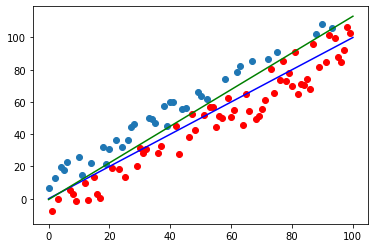

In [327]:
X_test = np.array([[i+(random.random()-0.5)*40,i] for i in range(100)])
y_test = np.array([1 if X_test[i,0]>i else -1 for i in range(100)])
y_test[20:30] *= -1

print(f"Acurácia em conjunto de teste: {clf.score(X_test,y_test)}")

y_pred = clf.predict(X_test)
t = clf.predict_proba(X_test)


blue = np.array([X_test[i,:] for i in range(100) if y_pred[i]==1 ])
red = np.array([X_test[i,:] for i in range(100) if y_pred[i]==-1 ])

x= np.linspace(0,100,500)
fig,ax = plt.subplots()
ax.scatter(blue[:,1],blue[:,0])
ax.scatter(red[:,1], red[:,0], color="r")
ax.plot(x, x, color="b")
ax.plot(x, -(clf.w[0]+x*clf.w[2])/clf.w[1], color="g")
print([t[90:100]])

In [328]:
from sklearn.metrics import precision_score

clf = MyLR(p_threshold=0.5, seed=43)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Precisão com p_treshold = 0.5 é {precision_score(y_test, y_pred, pos_label=-1)}")

clf = MyLR(p_threshold=1e-30, seed=43)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Precisão com p_treshold baixo é {precision_score(y_test, y_pred, pos_label=-1)}")


  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_10401/1477593649.py:32: RuntimeWarning: overflow encountered in exp
  gradient = np.sum(((yn*Xn)/np.array([(1+np.exp(np.sum(yn*self.w*Xn, axis=1)))]).T), axis=0)/N
100%|██████████| 1000/1000 [00:00<00:00, 13011.61it/s]


O erro final é 10.660562377623163
Precisão com p_treshold = 0.5 é 0.6984126984126984


  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_10401/1477593649.py:32: RuntimeWarning: overflow encountered in exp
  gradient = np.sum(((yn*Xn)/np.array([(1+np.exp(np.sum(yn*self.w*Xn, axis=1)))]).T), axis=0)/N
100%|██████████| 1000/1000 [00:00<00:00, 16790.58it/s]

O erro final é 10.660562377623163
Precisão com p_treshold baixo é 0.9444444444444444
